<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/Polynimial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [128]:
m=100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

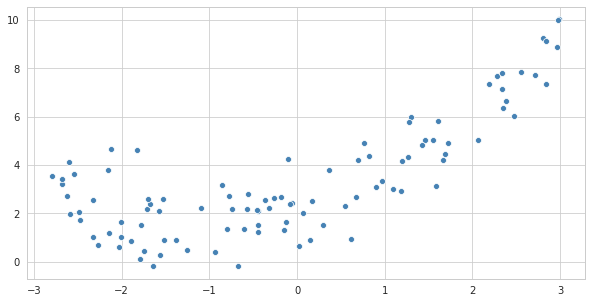

In [129]:
plt.figure(figsize=(10,5))
sns.scatterplot(X.reshape(-1,),y.reshape(-1,), color='steelblue');

In [130]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)
X_poly[0]

array([0.70052013, 0.49072845])

In [131]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
print(ln_reg.intercept_, ln_reg.coef_)

[2.13373438] [[1.00727423 0.46088386]]


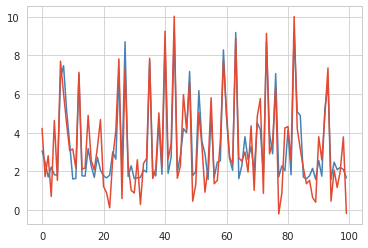

In [133]:
plt.plot(np.arange(100), ln_reg.predict(X_poly).reshape(-1,), color='steelblue')
plt.plot(np.arange(100), y)

In [134]:
poly_line = []

for x in X.flatten():
  yhat = 2.11474679 + (0.9362529*x) + (0.43646943*(x**2))
  poly_line.append(yhat)

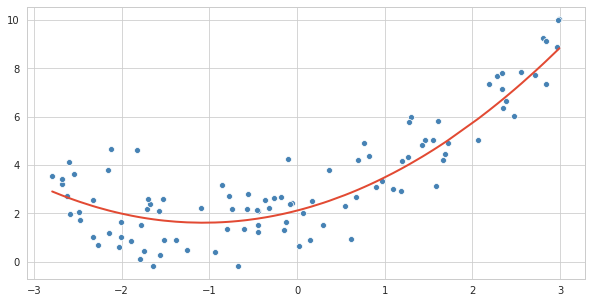

In [135]:
plt.figure(figsize=(10,5))
sns.scatterplot(X.reshape(-1,),y.reshape(-1,), color='steelblue');
sns.lineplot(X.reshape(-1,),poly_line, lw=2);

In [136]:
ln_reg.fit(X, y)

pred_ln = []

for x in X.flatten():
  yhat = ln_reg.intercept_ + (ln_reg.coef_ * x)
  pred_ln.append(yhat)

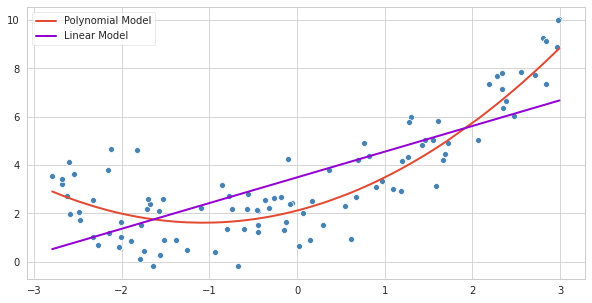

In [137]:
plt.figure(figsize=(10,5))
sns.scatterplot(X.reshape(-1,),y.reshape(-1,), color='steelblue');
sns.lineplot(X.reshape(-1,),poly_line, lw=2, label='Polynomial Model');
sns.lineplot(X.reshape(-1,),np.array(pred_ln).reshape(-1), lw=2, color='darkviolet', label='Linear Model');




In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves (model, X,y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)
  train_errors, val_errors = [], []
  for i in range(1, len(X_train)):
    model.fit(X_train[:i], y_train[:i])
    train_errors.append(mean_squared_error(y_train[:i], model.predict(X_train[:i])))
    val_errors.append(mean_squared_error(y_val, model.predict(X_val)))
  
  plt.plot(np.sqrt(train_errors), lw=2, label='Training Set')
  plt.plot(np.sqrt(val_errors), lw=3, label='Validation Set');
  plt.legend()

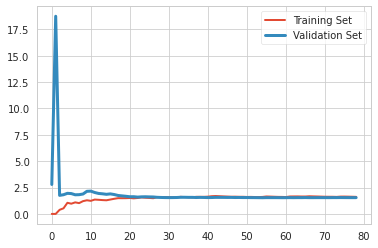

In [139]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

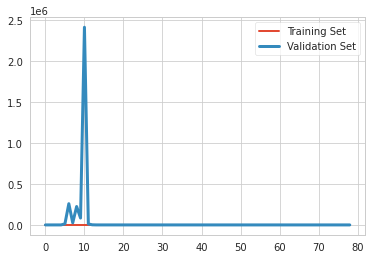

In [140]:
from sklearn.pipeline import Pipeline

poly_pipeline = Pipeline([
  ('poly', PolynomialFeatures(degree=10, include_bias=False)),
  ('model', LinearRegression())
])

plot_learning_curves(poly_pipeline, X, y)

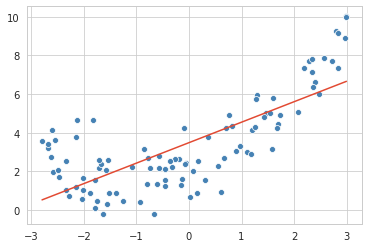

In [141]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
sns.scatterplot(X.reshape(-1,), y.reshape(-1,), color='steelblue')
sns.lineplot(X.reshape(-1,),ridge_reg.predict(X).reshape(-1,));

In [142]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from tqdm import tqdm

sgd_reg = SGDRegressor(warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
training_error = []
epochs = 1000

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)


for i in tqdm(range(epochs)):
  sgd_reg.fit(X_train, y_train)
  train_pred = sgd_reg.predict(X_train)
  tr_error = np.sqrt(mean_squared_error(y_train, train_pred))
  training_error.append(tr_error)

  val_pred = sgd_reg.predict(X_val)
  val_error = np.sqrt(mean_squared_error(y_val, val_pred))
  
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_model = clone(sgd_reg)
    best_epoch = i

100%|██████████| 1000/1000 [00:00<00:00, 1426.20it/s]


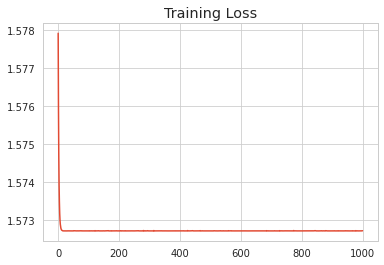

In [143]:
plt.title('Training Loss')
plt.plot(training_error);

In [144]:
best_model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [150]:
np.sqrt(mean_squared_error(y_train,best_model.predict(X_train)))

1.5775212554286728

In [147]:
training_error[best_epoch]

1.5727284990595547